In [1]:
import sys
sys.path.append('../../python-hackrf/')

In [2]:
import sys
sys.path.append('/usr/local/lib/wingpro10')
import wingdbstub

In [3]:
from hackrf import ScanHackRF
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import welch
from IPython.display import display, clear_output

In [4]:
# ----------------------------------------------------------------------
def custom_callback(data_freqs, sweep_config):
    """"""
    clear_output(wait=True)
    plt.figure(figsize=(20, 7), dpi=90)

    # print(data_freqs.keys())
    
    for i, f in enumerate(data_freqs):

        signal = data_freqs[f]
        w, x = welch(signal, fs=sweep_config['sample_rate'], nperseg=256)

        sorted_indices = np.argsort(w)
        w_sorted = w[sorted_indices] + f + sweep_config['step_offset']
        x_sorted = x[sorted_indices]
        
        
        plt.plot(w_sorted/1e6, x_sorted, color=f'C{i}')


    # plt.vlines(89.7, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(90.3, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(91.2, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(91.7, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(92.3, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(92.7, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(95.1, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(95.7, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(96.3, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(99.7, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(98.6, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(100, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(101.2, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(101.7, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(103.7, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(105.7, 0, 10e-10, linestyle='--', color='C3')
    # plt.vlines(107.3, 0, 10e-10, linestyle='--', color='C3')
    
    # print(sweep_config)
        
    plt.show()




In [5]:

history = []


# ----------------------------------------------------------------------
def custom_callback2(data_freqs, sweep_config):
    """"""
    global history

    if len(history) > 20:
        history.pop(0)
    
    clear_output(wait=True)
    plt.figure(figsize=(20, 7), dpi=90)

    for i, f in enumerate(data_freqs):

        signal = data_freqs[f]
        w, x = welch(signal, fs=sweep_config['sample_rate'], nperseg=256)

        sorted_indices = np.argsort(w)
        w_sorted = w[sorted_indices] + f + sweep_config['step_offset']
        x_sorted = x[sorted_indices]
        
        history.append(x_sorted)
        for j, h in enumerate(history[::1]):
            plt.plot(w_sorted/1e6 + (j*0.5), h+(j*0.5e-9), color=f'C{i}', zorder=100-j, linewidth=3)
            plt.fill_between(w_sorted/1e6 + (j*0.5), -100, h+(j*0.5e-9), color='w', zorder=100-j)




    plt.ylim(-1e-9, 15e-9)

        
    plt.show()




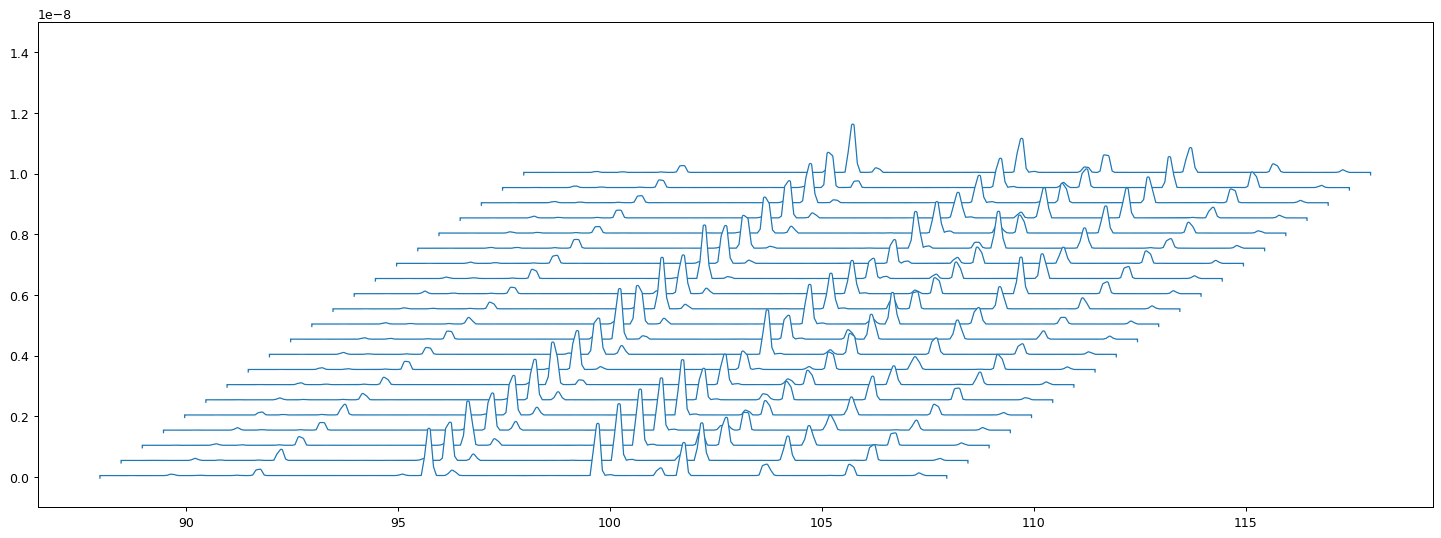

In [ ]:
scanhackrf = ScanHackRF(0)
await scanhackrf.scan(
    freqs=[
        # List of frequency tuples (start_freq, end_freq) in MHz
        (88, 108),
        # (90, 130),
    ],
    sample_rate=20e6,  
    step_width=20e6, 
    step_offset=None, 
    read_num_blocks=1,  
    buffer_num_blocks=1,  
    callback=custom_callback2,  
    interleaved=False,
)